In [0]:
import gym
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Policy Evaluation

In [0]:
environment = gym.make('FrozenLake-v0')

In [3]:
# 打印环境
environment.render()


SFFF
FHFH
FFFH
HFFG


In [4]:
# 查看从一个state到new state的概率
# 从state=6开始(也就是从起点开始), 进行action=1(向下走), 会有可能向左或右走.
# LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3

state = 6
action = 1
environment.P[state][action]

[(0.3333333333333333, 5, 0.0, True),
 (0.3333333333333333, 10, 0.0, False),
 (0.3333333333333333, 7, 0.0, True)]

In [5]:
# 我们就随机给定一个policy, 向每一个方向走都是0.25的概率
policy = np.ones((environment.nS, environment.nA)) / environment.nA
policy

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

In [0]:
def policy_evaluation(policy, environment, discount_factor=0.9, theta=1e-9, max_iterations=1000):
    """
    Evaluate a policy given a deterministic environment.

    PARAMETERS
    ----------
    policy: nS*nA的矩阵, 每一个值代表在这个state采取action的概率
    environment: gym提供的环境
    discount_factor: 折扣因子
    theta: 判断是否收敛, 如果value function里面的值改变较小, 则停止迭代
    max_iterations: 最大迭代次数
                    
    RETURNS
    -------
    V: 这个policy对应的value function
    """
    # 记录迭代次数
    evaluation_iterations = 1
    vList = [0] # 记录每次迭代前后v平均值的变化

    # 初始化value function向量, 也就是每个state到游戏结束可能获得的累计reward
    V = np.zeros(environment.nS)

    for i in range(int(max_iterations)):
        # 记录两次迭代value function改变的值, 用来判断是否收敛
        delta = 0
        
        for state in range(environment.nS): # 对所有的状态进行遍历			
            # 记录当前state的value
            v = 0
            
            # 当前state下所有能做的action和做的概率
            for action, action_probability in enumerate(policy[state]):
                # 采取相应的action之后, 下一步的新的state出现的概率
                for state_probability, next_state, reward, terminated in environment.P[state][action]:
                    # 这里修改一下原始reward的值, 每走一步reward减一, 终点reward是10
                    if reward == 0:
                        reward = reward - 1 # 每走一步reward都是-1
                    elif reward == 1:
                        reward = 10
                    # 计算value值
                    v += action_probability * state_probability * (reward + discount_factor * V[next_state])

                
            # 保存一个更新前后最大的差距
            delta = max(delta, abs(V[state] - v))
            
            # 更新state value
            V[state] = v
        
        # 计算前后差值, 用来绘图
        vList.append(np.abs(np.mean(V)))
        
        # 更新迭代次数
        evaluation_iterations += 1

        # 打印迭代10和20次后的value值
        if evaluation_iterations in [10, 20]:
            print('Evaluation iterations:{}'.format(evaluation_iterations))
            print(V.reshape(4,4))
        # 若收敛, 则早停止
        if(delta < theta):
            print('Policy evaluated in %d iterations' % evaluation_iterations)
            vdeltaList = np.array(vList[1:]) - np.array(vList[:-1])
            return V, vdeltaList
    
    vdeltaList = np.array(vList[1:]) - np.array(vList[:-1])
    return V, vdeltaList

In [7]:
V, vdeltaList = policy_evaluation(policy=policy, environment=environment)
print(V.reshape(4,4))

Evaluation iterations:10
[[-6.4507704  -6.49730403 -6.56394722 -6.51457622]
 [-6.43929532 -6.12579511 -6.30160344 -6.12579511]
 [-6.36727564 -6.09779259 -5.54196666 -6.12579511]
 [-6.12579511 -5.34285003 -2.45118631 -6.12579511]]
Evaluation iterations:20
[[-8.74838238 -8.75837677 -8.73701108 -8.76067403]
 [-8.7174594  -8.64914828 -8.5234858  -8.64914828]
 [-8.60194468 -8.22714016 -7.6795972  -8.64914828]
 [-8.64914828 -7.44191556 -4.56304673 -8.64914828]]
Policy evaluated in 199 iterations
[[-9.95075012 -9.95355297 -9.88926567 -9.95469959]
 [-9.92605845 -9.99999999 -9.7103292  -9.99999999]
 [-9.79456232 -9.3663229  -8.82330857 -9.99999999]
 [-9.99999999 -8.56578645 -5.69360823 -9.99999999]]


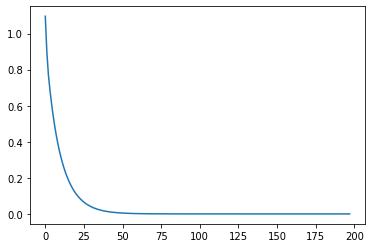

In [8]:
# V的值的变化趋势
fig = plt.figure()
ax = fig.add_subplot(1,1,1)


ax.plot(vdeltaList)

fig.show()